In [46]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('Olympics_Dataset/athlete_events.csv')
reg_df = pd.read_csv('Olympics_Dataset/noc_regions.csv')

In [48]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [49]:
print(df.shape)

# Analyzing only the sumer olympics data
df = df[df['Season']=='Summer']

print(df.shape)

(271116, 15)
(222552, 15)


In [50]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [51]:
# reg_df has the NOC (National Orgainizing Committe) , belonging to the a particular region and county
reg_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [52]:
# Merging them on NOC
df = df.merge(reg_df,on='NOC',how='left')
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [53]:
# Countries that have participated
print(df['region'].unique())
df['region'].unique().shape


['China' 'Denmark' 'Netherlands' 'Finland' 'Norway' 'Romania' 'Estonia'
 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy' 'Chad'
 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece'
 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'USA' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' nan 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Sri Lanka' 'Armenia' 'Ivory Coast' 'Kenya' 'Benin'
 'UK' 'Ghana' 'Somalia' 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica'
 'Panama' 'Georgia' 'Slovenia' 'Guyana' 'New Zealand' 'Portugal'
 'Paraguay' 'Angola' 'Venezu

(206,)

In [54]:
# The Missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [55]:
# Duplicated rows
print('Duplicated rows : ',df.duplicated().sum())

df.drop_duplicates(inplace=True)

print('Duplicated rows after removing : ',df.duplicated().sum())

Duplicated rows :  1385
Duplicated rows after removing :  0


## Medal Analysis

In [56]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [57]:
# One hot encoding the Medal values
medal_encoded = pd.get_dummies(df['Medal'])
print(medal_encoded)

# Concatenating with original dataframe
df = pd.concat([df,medal_encoded],axis=1)

df.head()

        Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [58]:
df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_7876\4042608481.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,region,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,Russia,1220,974,994
2,Germany,1075,987,1064
3,UK,635,729,620
4,Italy,518,474,454
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [59]:
# The above table , I get by grouping by the region for medals is wrong as the 'df' is the dataframe which is made upon the athelets and the events they participated in it , so groupby.sum is able to count the duplicate rows

# Can be verified by this example
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

# As the rows are 131 , so it gives the idea that India has won 131 gold Medals,
# But duplicate rows are there.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [60]:
# So have to remove the duplicate rows

medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

medal_tally

C:\Users\hp\AppData\Local\Temp\ipykernel_7876\568252412.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [61]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0,'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [62]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [63]:

def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0

    if year=='Overall' and country=='Overall':
        temp_df = medal_df

    elif year=='Overall' and country!='Overall':
        flag = 1
        temp_df = medal_df[medal_df['region']==country]

    elif year!='Overall' and country=='Overall':
        temp_df = medal_df[medal_df['Year']==int(year)]

    else:
        temp_df = medal_df[(medal_df['Year']==int(year)) & (medal_df['region']==country)]


    if(flag):
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)



In [64]:
fetch_medal_tally(df,year='1896',country='USA')

  region  Gold  Silver  Bronze  Total
0    USA    11       6       2     19


C:\Users\hp\AppData\Local\Temp\ipykernel_7876\2002986561.py:22: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## Overall Analysis
1. No of editions
2. No of cities
3. No of events/sports
4. No of atheletes
5. participating nations

In [65]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [66]:
# No of times olympics happened
df['Year'].unique().shape[0] - 1

28

In [67]:
# No of cities 
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [68]:
df['Sport'].unique().shape[0]

52

In [69]:
df['Name'].unique().shape[0]

116122

In [70]:
df['region'].unique().shape[0]

206

In [71]:
# Participating nations over time
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index()
nations_over_time.columns = ['Edition','nations_participated']
nations_over_time = nations_over_time.sort_values('Edition').reset_index().drop(columns=['index'])
nations_over_time

,Edition,nations_participated
0,1896,12
1,1900,31
2,1904,14
3,1906,20
4,1908,22
5,1912,29
6,1920,29
7,1924,45
8,1928,46
9,1932,47


In [72]:
import plotly.express as px

fig = px.line(nations_over_time,x='Edition',y='nations_participated')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

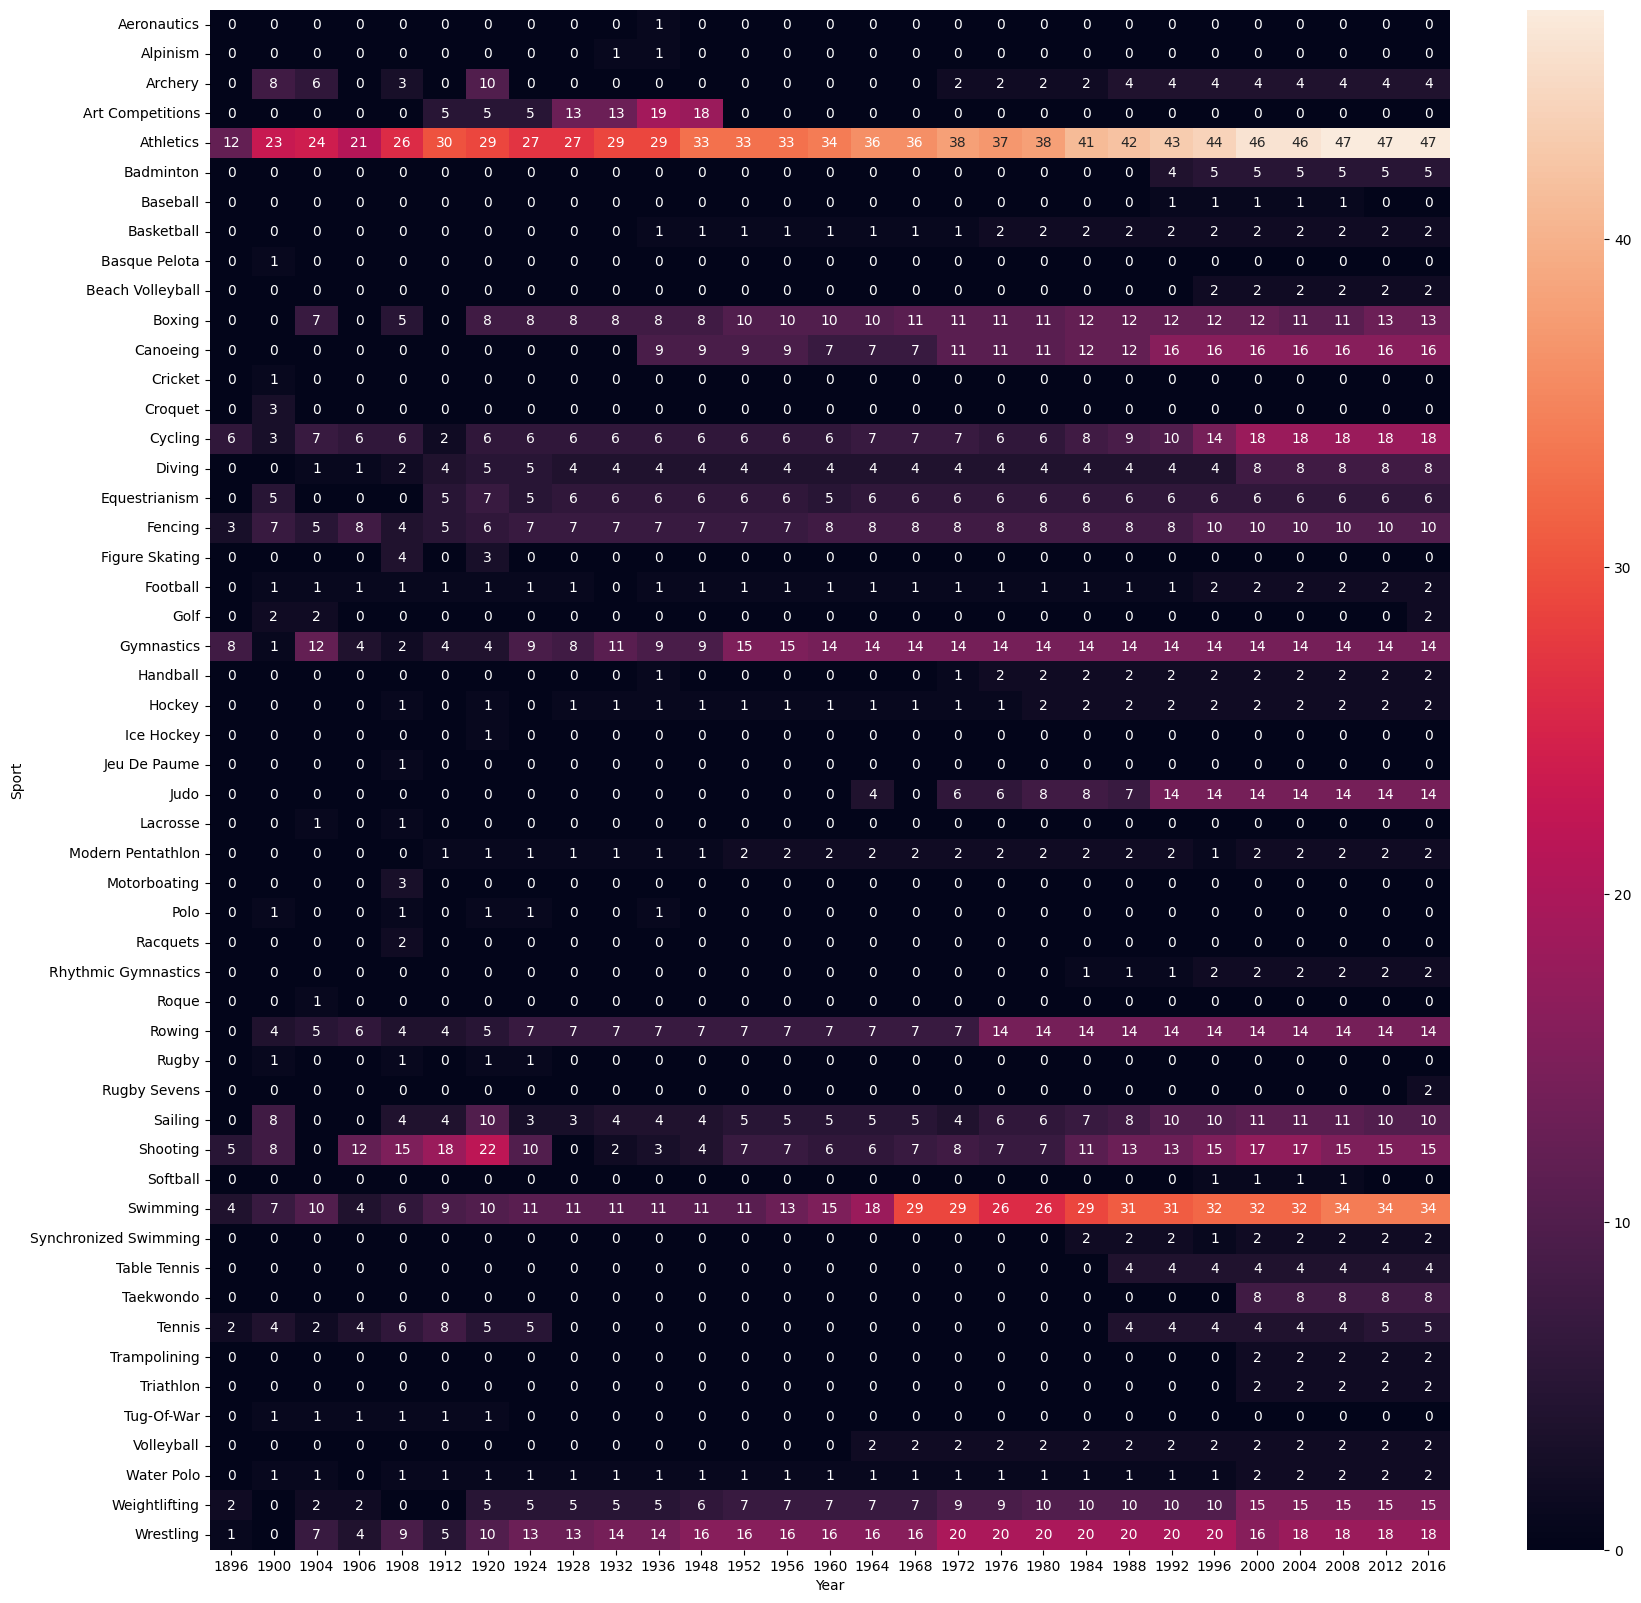

In [73]:
# Plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

x = df.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [74]:
def most_successful_athlete_by_sport(df, sport):

    # Remove the rows of athletes that haven't won any medal
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
        df = df[df['Sport'] == sport]

    
    ans_df = temp_df['Name'].value_counts().reset_index().head(15)
    ans_df.rename(columns={'index': 'Name', 'Name': 'Medals'},inplace='True')
    ans_df = ans_df.merge(df, on='Name')[['Name', 'Medals', 'Sport', 'region']].drop_duplicates('Name').reset_index()
    ans_df = ans_df.drop(columns=['index'])

        
    return ans_df

most_successful_athlete_by_sport(df, 'Gymnastics')


,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
1,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
2,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
3,Takashi Ono,13,Gymnastics,Japan
4,Sawao Kato,12,Gymnastics,Japan
5,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
6,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
7,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
8,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
9,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


## Country wise
1. Countrywise medal tally per year (line plot)
2. What countries are good at heatmap
3. Most Successful Athletes(Top 10)

In [75]:
temp_df = df.dropna(subset=['Medal'])
temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [76]:
new_df = temp_df[temp_df['region'] == 'Andorra']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()
final_df

,Year,Medal


In [77]:
fig = px.line(final_df,x='Year',y='Medal',line_shape='linear')
fig.update_layout(xaxis=dict(dtick=8))
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

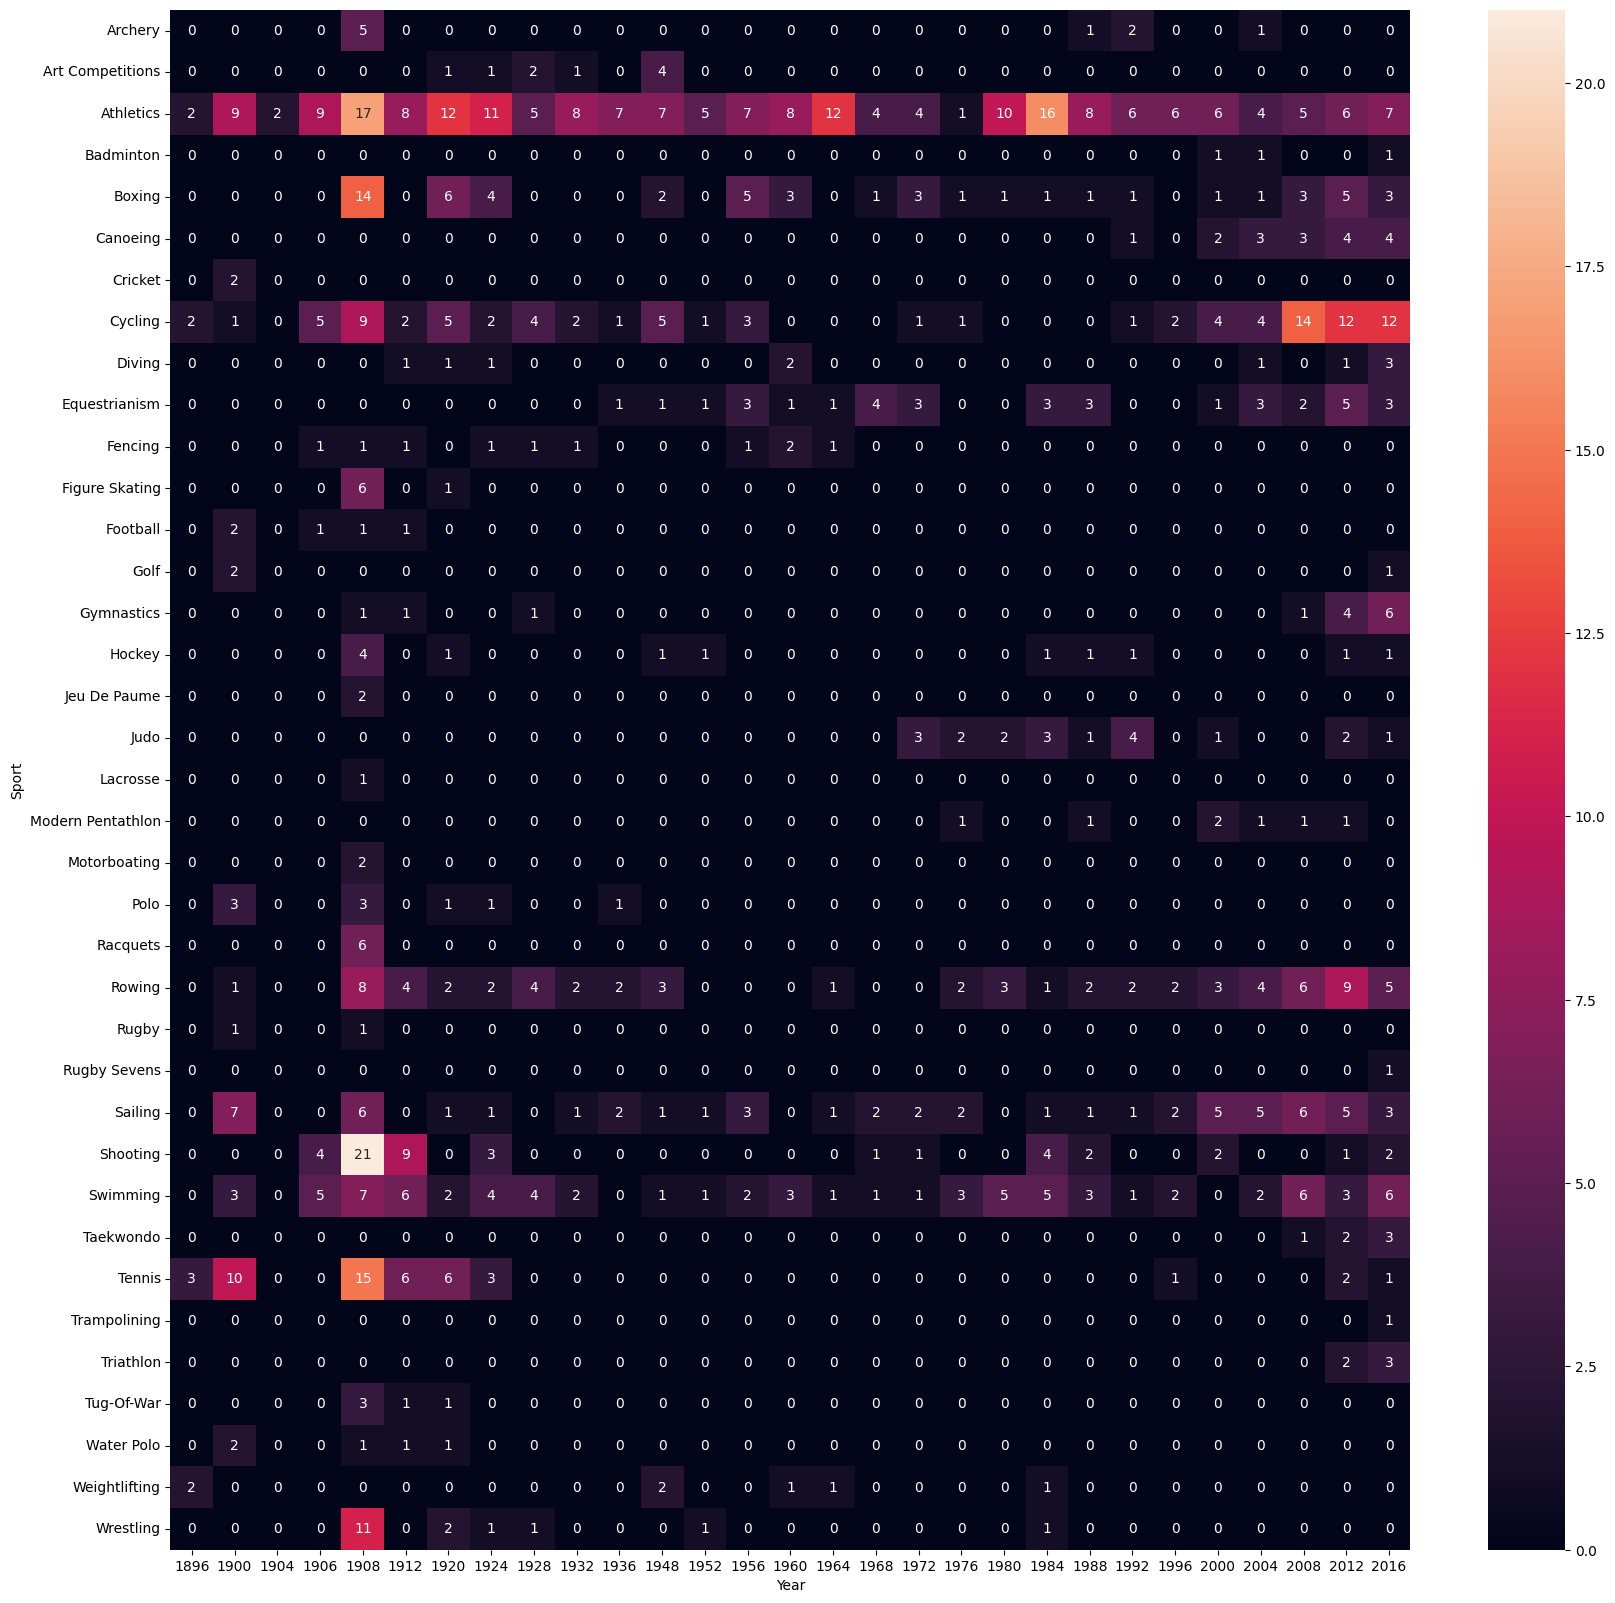

In [78]:
# Generating Heatmap for countries being good at which sport

temp_df = df.dropna(subset=['Medal'])
temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
new_df = temp_df[temp_df['region'] == 'UK']

plt.figure(figsize=(20,20))
heatmap_data = new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int)
sns.heatmap(heatmap_data,annot=True)

In [79]:
# Most succesfull atheletes of the country

def most_successful_athlete_of_country(df, country):

    # Remove the rows of athletes that haven't won any medal
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]
       
    
    ans_df = temp_df['Name'].value_counts().reset_index().head(15)
    ans_df.rename(columns={'index': 'Name', 'Name': 'Medals'},inplace='True')
    ans_df = ans_df.merge(df, on='Name')[['Name', 'Medals', 'Sport']].drop_duplicates('Name').reset_index()
    ans_df = ans_df.drop(columns=['index'])

        
    return ans_df

most_successful_athlete_of_country(df, 'UK')

,Name,Medals,Sport
0,Henry Taylor,8,Swimming
1,Bradley Marc Wiggins,8,Cycling
2,"Christopher Andrew ""Chris"" Hoy",7,Cycling
3,Jason Francis Kenny,7,Cycling
4,John Arthur Jarvis,6,Water Polo
5,"Stephen Geoffrey ""Steven"" Redgrave",6,Rowing
6,"Kathleen ""Kitty"" McKane (-Godfree)",5,Tennis
7,Jack Beresford,5,Rowing
8,Katherine Jane Grainger,5,Rowing
9,"Charles Benedict ""Ben"" Ainslie",5,Sailing


## Athlete Wise Analysis

In [80]:
# Distrubution plot 
import plotly.figure_factory as ff
import scipy
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()


fig = ff.create_distplot([x1,x2,x3,x4], ['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'], show_hist=False, show_rug=False, curve_type='normal')

fig.show()


In [81]:
# Sports distribution over age

famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                 'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                 'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                 'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                 'Tennis', 'Golf', 'Softball', 'Archery',
                 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                 'Rhythmic Gymnastics', 'Rugby Sevens',
                 'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)
    
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600,xaxis_title='Age',yaxis_title='Density')
fig.show()

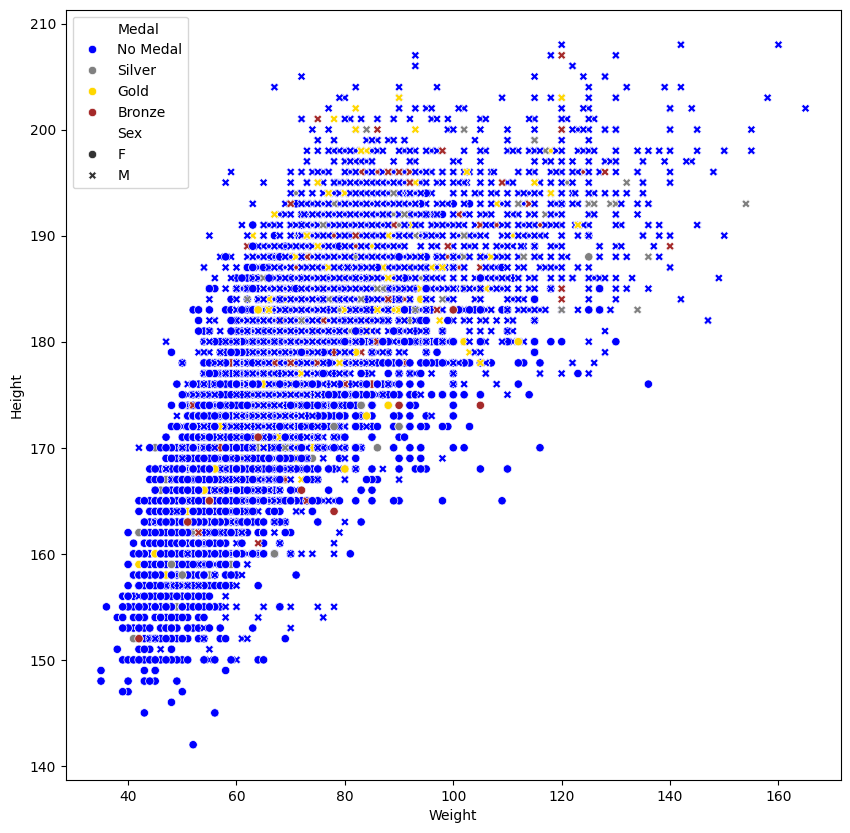

In [92]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
athlete_df['Medal'].fillna('No Medal', inplace=True)
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
plt.figure(figsize=(10,10))
medal_palette = {'No Medal': 'Blue', 'Gold': 'gold', 'Silver': 'grey', 'Bronze': 'brown'}
sns.scatterplot(data=temp_df,x='Weight', y='Height',hue=temp_df['Medal'],palette=medal_palette,style=temp_df['Sex'])
plt.show()